In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('archives\dados_bacen.csv', index_col=0, parse_dates=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Neon Live\AppData\Local\Temp\ipykernel_33412\1040498732.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('archives\dados_bacen.csv', index_col=0, parse_dates=True)


In [23]:
df

,Dólar (PTAX),Selic Diária (%),Selic Anual (%),IPCA Anual (%),BVSP
2000-01-01,1.8003,0.069186,0.190399,0.0885,16930.0
2000-01-02,1.8003,0.069186,0.190399,0.0885,16930.0
2000-01-03,1.8003,0.069186,0.190399,0.0885,16930.0
2000-01-04,1.8329,0.069186,0.190399,0.0885,15851.0
2000-01-05,1.8536,0.069220,0.190501,0.0885,16245.0
...,...,...,...,...,...
2025-12-28,5.5407,0.055131,0.149000,0.0426,160490.0
2025-12-29,5.5733,0.055131,0.149000,0.0426,160490.0
2025-12-30,5.5018,0.055131,0.149000,0.0426,161125.0
2025-12-31,5.5018,0.055131,0.149000,0.0426,NaN


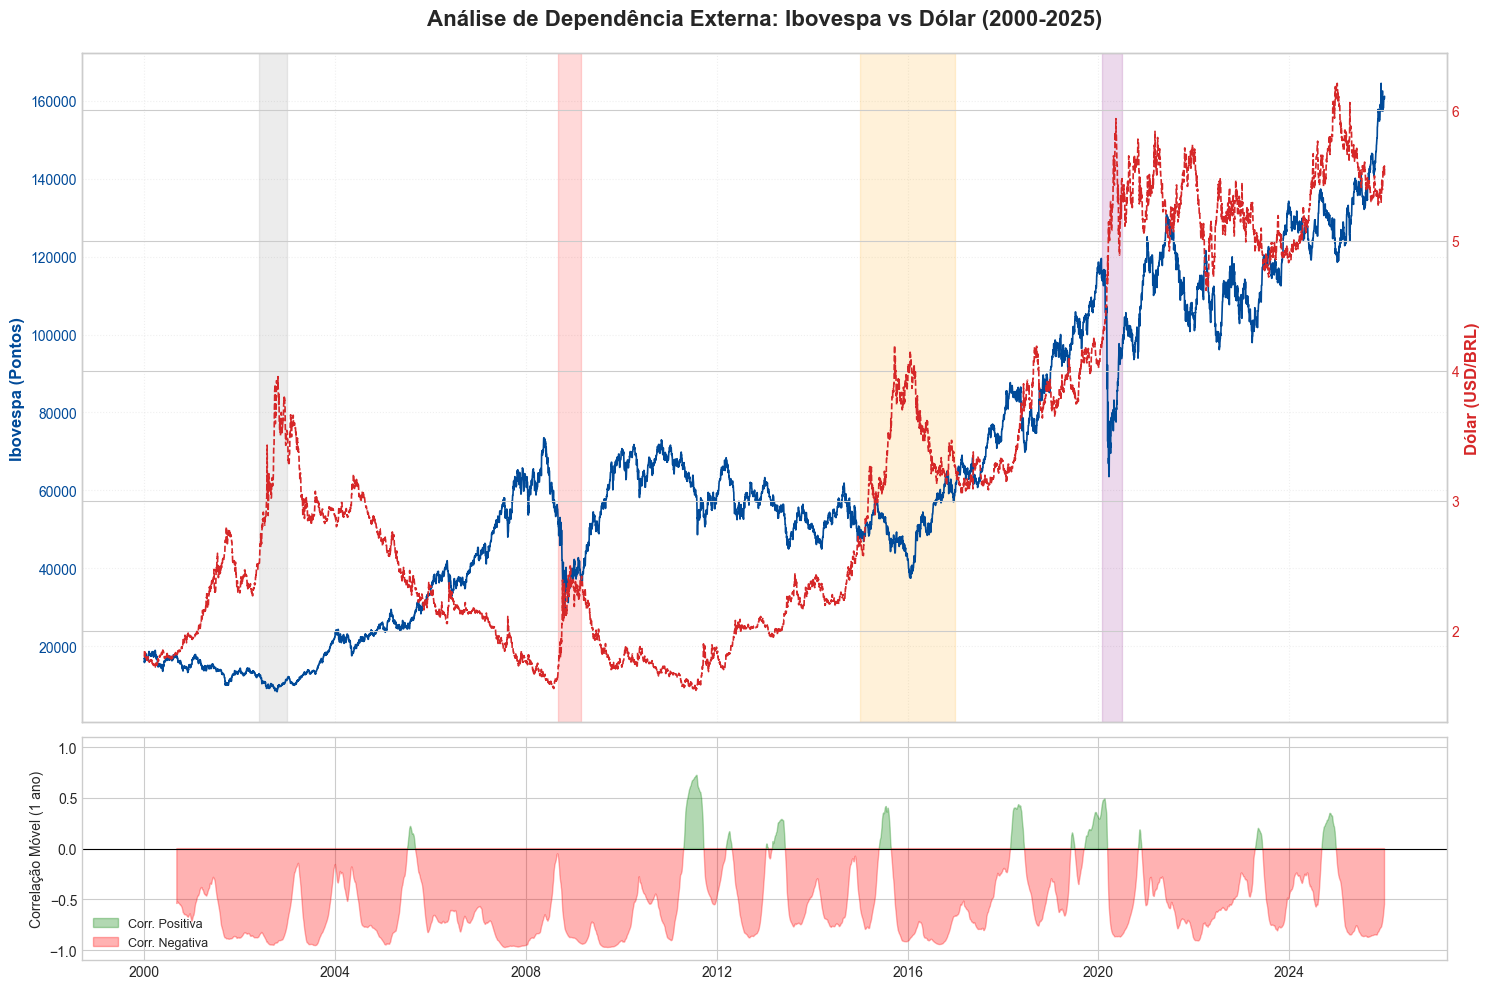

In [24]:
# Cálculo da Correlação Móvel (Janela de 252 dias úteis)
df['corr'] = df['BVSP'].rolling(window=252).corr(df['Dólar (PTAX)'])

# 2. Configuração do Gráfico (Subplots)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, 
                               gridspec_kw={'height_ratios': [3, 1]})

# --- Gráfico Superior: Preços ---
ax1.plot(df.index, df['BVSP'], color='#004a99', lw=1.2, label='Ibovespa')
ax1.set_ylabel('Ibovespa (Pontos)', color='#004a99', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#004a99')

ax1_twin = ax1.twinx()
ax1_twin.plot(df.index, df['Dólar (PTAX)'], color='#d62728', lw=1.2, linestyle='--', label='Dólar')
ax1_twin.set_ylabel('Dólar (USD/BRL)', color='#d62728', fontsize=12, fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor='#d62728')

ax1.set_title('Análise de Dependência Externa: Ibovespa vs Dólar (2000-2025)', fontsize=16, fontweight='bold', pad=20)
ax1.grid(alpha=0.3, linestyle=':')

# --- Destaques Históricos (Anotações Acadêmicas) ---
eventos = [
    ('2002-06-01', '2003-01-01', 'Risco Lula', 'gray'),
    ('2008-09-01', '2009-03-01', 'Subprime', 'red'),
    ('2015-01-01', '2016-12-31', 'Crise Fiscal', 'orange'),
    ('2020-02-01', '2020-07-01', 'Pandemia', 'purple')
]

for start, end, label, color in eventos:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.15)

# --- Gráfico Inferior: Correlação Móvel ---
ax2.fill_between(df.index, 0, df['corr'], where=(df['corr'] >= 0), color='green', alpha=0.3, label='Corr. Positiva')
ax2.fill_between(df.index, 0, df['corr'], where=(df['corr'] < 0), color='red', alpha=0.3, label='Corr. Negativa')
ax2.axhline(0, color='black', lw=0.8)
ax2.set_ylabel('Correlação Móvel (1 ano)', fontsize=10)
ax2.set_ylim(-1.1, 1.1)
ax2.legend(loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

# 1. Calculando os retornos percentuais (Variação Diária)
df_retornos = df[['BVSP', 'Dólar (PTAX)']].pct_change().dropna()

# 2. Calculando a correlação dos retornos
corr_retornos = df_retornos['BVSP'].corr(df_retornos['Dólar (PTAX)'])

print(f"Correlação Nominal (Longo Prazo): {df['BVSP'].corr(df['Dólar (PTAX)']):.4f}")
print(f"Correlação de Retornos (Dia a Dia): {corr_retornos:.4f}")

Correlação Nominal (Longo Prazo): 0.7448
Correlação de Retornos (Dia a Dia): -0.2485


C:\Users\Neon Live\AppData\Local\Temp\ipykernel_33412\1494724350.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_retornos = df[['BVSP', 'Dólar (PTAX)']].pct_change().dropna()


C:\Users\Neon Live\AppData\Local\Temp\ipykernel_33412\1443843936.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ret = df[['BVSP', 'Dólar (PTAX)']].pct_change().dropna()


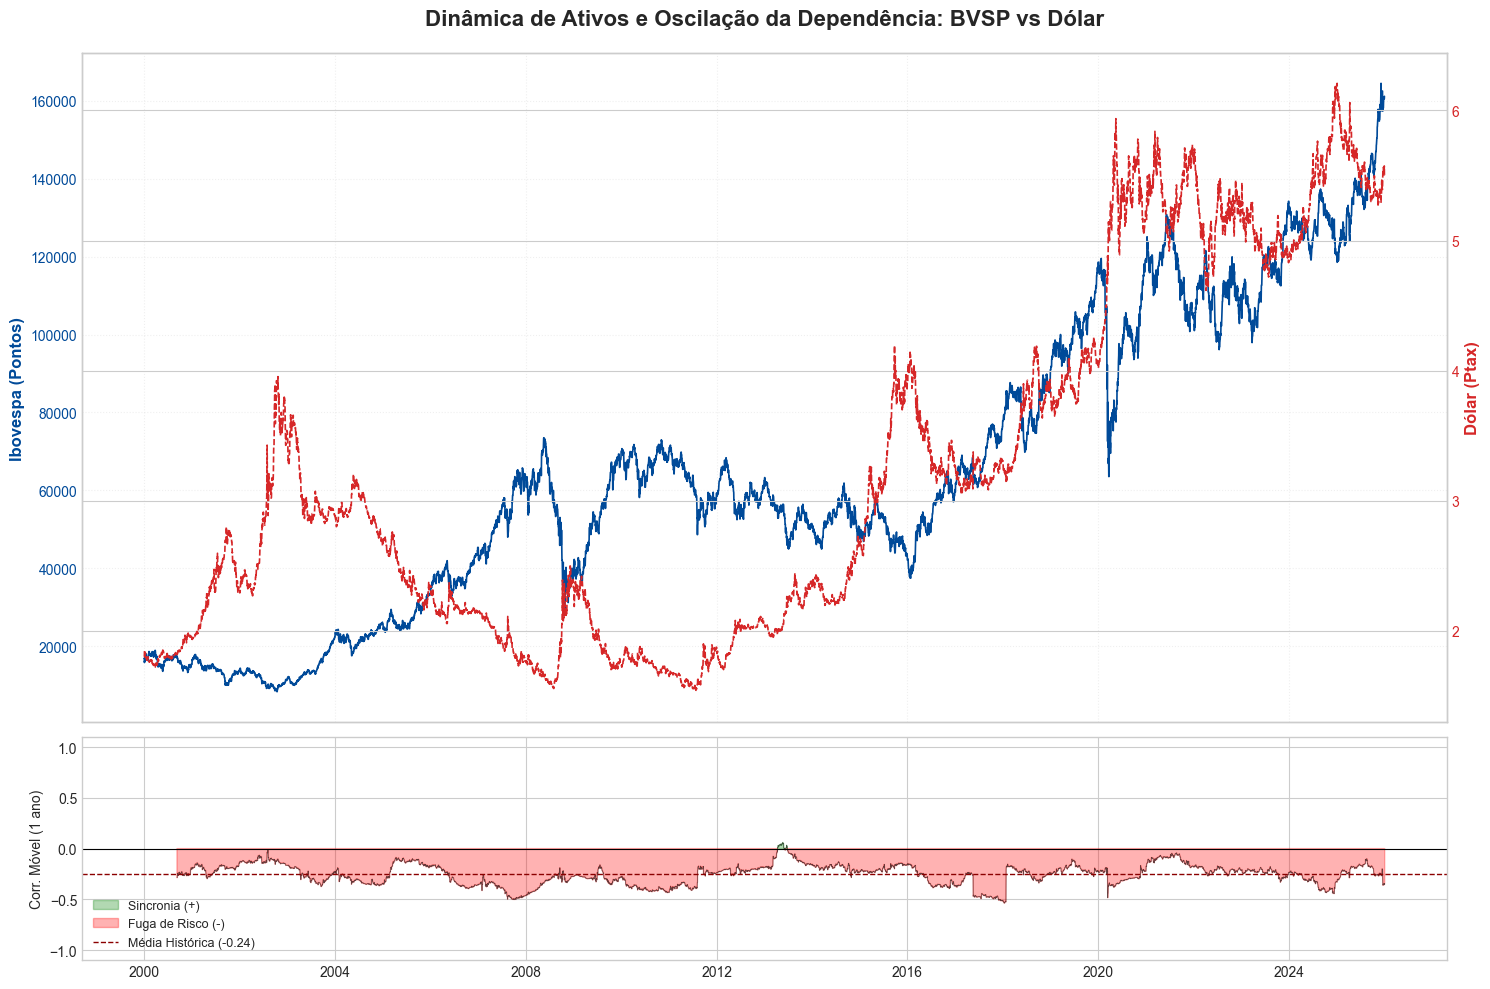

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregando os dados do arquivo local
# O 'index_col=0' trata a primeira coluna (datas sem nome) como o índice
path = r"archives\dados_bacen.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)

# 2. Preparação para a análise de Relações Internacionais
# Calculamos os retornos diários para captar a "pulsação" do risco
df_ret = df[['BVSP', 'Dólar (PTAX)']].pct_change().dropna()

# Cálculo da Correlação Móvel de 1 ano útil (252 pregões)
# Isso revela como a dependência externa oscila em diferentes governos/crises
df_ret['corr_movel'] = df_ret['BVSP'].rolling(window=252).corr(df_ret['Dólar (PTAX)'])

# 3. Configuração do Gráfico de Dois Níveis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True, 
                               gridspec_kw={'height_ratios': [3, 1]})

# --- Subplot Superior: Preços Nominais (Contexto Histórico) ---
color_ibov = '#004a99'
ax1.plot(df.index, df['BVSP'], color=color_ibov, lw=1.2, label='Ibovespa')
ax1.set_ylabel('Ibovespa (Pontos)', color=color_ibov, fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=color_ibov)

ax1_twin = ax1.twinx()
color_dolar = '#d62728'
ax1_twin.plot(df.index, df['Dólar (PTAX)'], color=color_dolar, lw=1.2, linestyle='--', label='Dólar')
ax1_twin.set_ylabel('Dólar (Ptax)', color=color_dolar, fontsize=12, fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor=color_dolar)

ax1.set_title('Dinâmica de Ativos e Oscilação da Dependência: BVSP vs Dólar', fontsize=16, fontweight='bold', pad=20)
ax1.grid(alpha=0.3, linestyle=':')

# --- Subplot Inferior: A "Pulsação" da Correlação (Oscilação) ---
ax2.fill_between(df_ret.index, 0, df_ret['corr_movel'], 
                 where=(df_ret['corr_movel'] >= 0), color='green', alpha=0.3, label='Sincronia (+)')
ax2.fill_between(df_ret.index, 0, df_ret['corr_movel'], 
                 where=(df_ret['corr_movel'] < 0), color='red', alpha=0.3, label='Fuga de Risco (-)')
ax2.plot(df_ret.index, df_ret['corr_movel'], color='black', lw=0.5, alpha=0.6)

# Linha da média histórica que calculamos anteriormente
ax2.axhline(-0.2485, color='darkred', linestyle='--', lw=1, label='Média Histórica (-0.24)')
ax2.axhline(0, color='black', lw=0.8)

ax2.set_ylabel('Corr. Móvel (1 ano)', fontsize=10)
ax2.set_ylim(-1.1, 1.1)
ax2.legend(loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np

# 1. Carregando os dados
df = pd.read_csv(r"archives\dados_bacen.csv", index_col=0, parse_dates=True)

# 2. Calculando os retornos (Variação %)
# O Beta deve ser calculado sobre os retornos para evitar a inflação nominal
df_ret = df[['BVSP', 'Dólar (PTAX)']].pct_change().dropna()

# 3. Calculando o Beta (Regressão Linear Simples)
# BVSP = alpha + Beta * Dolar
y = df_ret['BVSP']
x = df_ret['Dólar (PTAX)']

# numpy.polyfit retorna [inclinação (beta), intercepto (alpha)]
beta, alpha = np.polyfit(x, y, 1)

# 4. Calculando o R-quadrado (Quanto do movimento da bolsa o dólar explica)
correlação = df_ret['BVSP'].corr(df_ret['Dólar (PTAX)'])
r_quadrado = correlação**2

print(f"Número Consolidado (Beta): {beta:.4f}")
print(f"Poder de Explicação (R²): {r_quadrado:.4f}")

Número Consolidado (Beta): -0.4463
Poder de Explicação (R²): 0.0618


C:\Users\Neon Live\AppData\Local\Temp\ipykernel_33412\2894281234.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ret = df[['BVSP', 'Dólar (PTAX)']].pct_change().dropna()


Colunas identificadas: Bolsa -> BVSP | Dólar -> Dólar (PTAX)


C:\Users\Neon Live\AppData\Local\Temp\ipykernel_33412\1659034270.py:19: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ret = df[[col_ibov, col_dolar]].pct_change().dropna()


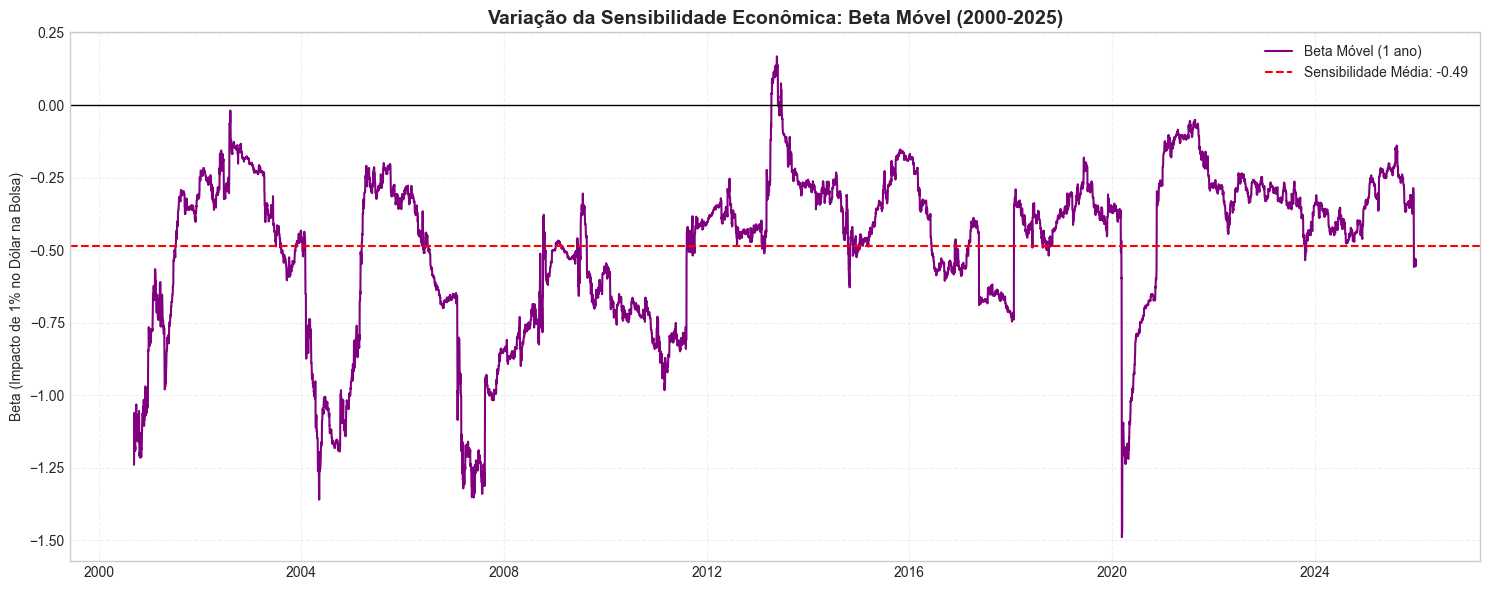


--- CONSOLIDAÇÃO PARA O ARTIGO ---
Beta Histórico Médio: -0.4463


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregando com tratamento de colunas
path = r"archives\dados_bacen.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)

# Limpa espaços em branco extras (ex: ' Dólar' vira 'Dólar')
df.columns = df.columns.str.strip()

# 2. Identificação Automática (Garante que o código não quebre por causa do 'ó')
# Procuramos as colunas que contenham essas palavras
col_ibov = [c for c in df.columns if 'BVSP' in c][0]
col_dolar = [c for c in df.columns if 'Dólar' in c or 'Dolar' in c][0]

print(f"Colunas identificadas: Bolsa -> {col_ibov} | Dólar -> {col_dolar}")

# 3. Cálculo dos Retornos
df_ret = df[[col_ibov, col_dolar]].pct_change().dropna()

# 4. Cálculo do Beta Móvel (1 ano)
rolling_cov = df_ret[col_ibov].rolling(window=252).cov(df_ret[col_dolar])
rolling_var = df_ret[col_dolar].rolling(window=252).var()
df_ret['beta_movel'] = rolling_cov / rolling_var

# 5. Visualização da Sensibilidade
plt.figure(figsize=(15, 6))
plt.plot(df_ret.index, df_ret['beta_movel'], color='purple', lw=1.5, label='Beta Móvel (1 ano)')

# Linhas de referência para análise de RI
plt.axhline(0, color='black', lw=1)
plt.axhline(df_ret['beta_movel'].mean(), color='red', linestyle='--', 
            label=f'Sensibilidade Média: {df_ret["beta_movel"].mean():.2f}')

plt.title('Variação da Sensibilidade Econômica: Beta Móvel (2000-2025)', fontsize=14, fontweight='bold')
plt.ylabel('Beta (Impacto de 1% no Dólar na Bolsa)')
plt.grid(alpha=0.3, linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Consolidação em um número para o seu artigo
beta_final = (df_ret[col_ibov].cov(df_ret[col_dolar])) / df_ret[col_dolar].var()
print(f"\n--- CONSOLIDAÇÃO PARA O ARTIGO ---")
print(f"Beta Histórico Médio: {beta_final:.4f}")

In [34]:
# Definindo as janelas de crise no seu DataFrame de retornos (df_ret)
crises = {
    "Subprime (2008)": ('2008-01-01', '2009-06-01'),
    "Crise Fiscal (2015)": ('2015-01-01', '2016-12-31'),
    "Pandemia (2020)": ('2020-02-01', '2020-12-31')
}

print("--- IMPACTO DO DÓLAR POR PERÍODO (BETA) ---")
for nome, (inicio, fim) in crises.items():
    fatia = df_ret.loc[inicio:fim]
    beta_crise = fatia[col_ibov].cov(fatia[col_dolar]) / fatia[col_dolar].var()
    print(f"{nome}: {beta_crise:.4f}")

--- IMPACTO DO DÓLAR POR PERÍODO (BETA) ---
Subprime (2008): -0.5398
Crise Fiscal (2015): -0.3724
Pandemia (2020): -0.5886


In [19]:
df_analise.to_csv('analise_ibovespa_dolar.csv')